In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# For scaling the data
from sklearn.preprocessing import StandardScaler


In [3]:
# Create a sample dataframe
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6],
    'Annual_Spend': [10000, 15000, 7000, 20000, 30000, 12000],
    'Number_of_Transactions': [50, 60, 30, 100, 150, 70],
    'Years_as_Customer': [5, 10, 3, 12, 15, 8]
}

df = pd.DataFrame(data)

# Remove CustomerID for clustering purposes
X = df.drop('CustomerID', axis=1)


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
wcss = []
max_clusters = min(len(df), 10)  # Ensure number of clusters does not exceed number of samples

for i in range(1, max_clusters + 1):
    try:
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
    except ValueError as e:
        print(f"ValueError with {i} clusters: {e}")
    except Exception as e:
        print(f"Error with {i} clusters: {e}")


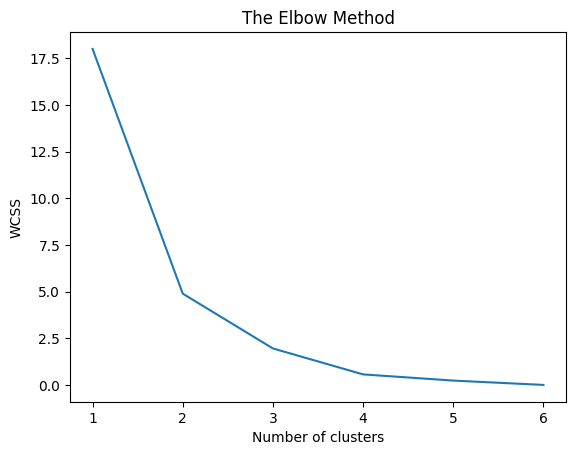

In [11]:
plt.plot(range(1, max_clusters + 1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()